# Exploratory Data Analysis

Data: https://www.kaggle.com/datasets/arjunprasadsarkhel/2021-olympics-in-tokyo?select=Medals.xlsx

In [1]:
import pandas as pd
import os

In [2]:
pwd = os.getcwd()
pwd

'/Users/jeremy.yap/Documents/Road to Data Analyst Career Path/Practical Statistics/Chapter 1 - Exploratory Data Analysis'

In [3]:
medal_count = pd.read_excel(pwd + "/Data/Medals.xlsx")
medal_count

/opt/anaconda3/envs/minimal_ds/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3
...,...,...,...,...,...,...,...
88,86,Ghana,0,0,1,1,77
89,86,Grenada,0,0,1,1,77
90,86,Kuwait,0,0,1,1,77
91,86,Republic of Moldova,0,0,1,1,77


## Estimates of Location

In [4]:
# Mean
medal_count['Total'].mean()

11.612903225806452

In [5]:
# Weighted Mean

import numpy as np
np.average(medal_count['Gold'], weights=medal_count['Total'])

14.743518518518519

In [6]:
# Trimmed Mean

from scipy.stats import trim_mean
trim_mean(medal_count['Total'], 0.1)

6.8933333333333335

In [7]:
# Median

medal_count['Total'].median()

4.0

In [8]:
# Weighted Median

def weight_median(df, median_col, weight_col):
    df_sorted = df.sort_values(median_col)
    cumsum = df_sorted[weight_col].cumsum()
    cutoff = df_sorted[weight_col].sum() / 2
    return df_sorted[cumsum >= cutoff][median_col].iloc[0]

weight_median(medal_count, 'Gold', 'Total')


10

In [9]:
# 75% Percentile (Q3)

np.percentile(medal_count['Total'], 75)

11.0

In [10]:
medal_count.describe()

,Rank,Gold,Silver,Bronze,Total,Rank by Total
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,46.333333,3.655914,3.634409,4.322581,11.612903,43.494624
std,26.219116,7.022471,6.626339,6.210372,19.091332,24.171769
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,24.000000,0.000000,0.000000,1.000000,2.000000,23.000000
50%,46.000000,1.000000,1.000000,2.000000,4.000000,47.000000
75%,70.000000,3.000000,4.000000,5.000000,11.000000,66.000000
max,86.000000,39.000000,41.000000,33.000000,113.000000,77.000000


## Estimates of Variability (Dispersion Metrics)

In [11]:
# Variance

from statistics import variance
variance(medal_count['Gold'])

49.315100514259

In [12]:
# Standard Deviation 

from statistics import stdev
stdev(medal_count['Gold'])

7.022471111671376

In [13]:
# Mean Absolute Deviation (Mean of the absolute value of the deviation form the mean)

from numpy import mean, absolute
mean(absolute(medal_count['Gold'] - mean(medal_count['Gold'])))

4.0048560527228565

In [14]:
# Median Absolute Deviation (Median of the absolute value of the deviation form the median)

from numpy import median, absolute
median(absolute(medal_count['Gold'] - median(medal_count['Gold'])))

1.0

In [15]:
# Interquantile Range (Diffence between 75th and 25th percentile)

q3, q1 = np.percentile(medal_count['Gold'], [75, 25])
iqr = q3 - q1
iqr

3.0

## Exploring the Data Distribution

<AxesSubplot:>

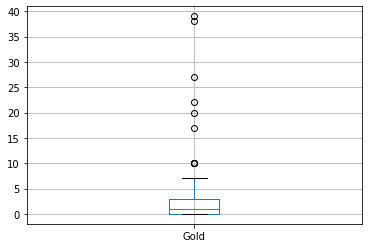

In [16]:
# Box plots (Visually summarize the distribution of data in a dataset)

medal_count.boxplot(column= 'Gold')

In [17]:
# Frequency Table

frequency_table = medal_count.copy()
frequency_table['freq'] = pd.cut(frequency_table['Gold'], 10)
frequency_table.groupby('freq')['Rank'].count().reset_index()

,freq,Rank
0,"(-0.039, 3.9]",72
1,"(3.9, 7.8]",11
2,"(7.8, 11.7]",4
3,"(11.7, 15.6]",0
4,"(15.6, 19.5]",1
5,"(19.5, 23.4]",2
6,"(23.4, 27.3]",1
7,"(27.3, 31.2]",0
8,"(31.2, 35.1]",0
9,"(35.1, 39.0]",2


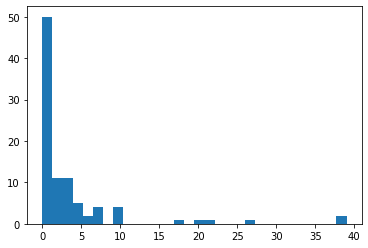

In [18]:
import matplotlib.pyplot as plt
plt.hist(medal_count['Gold'], bins ='auto')
plt.show()

<AxesSubplot:ylabel='Density'>

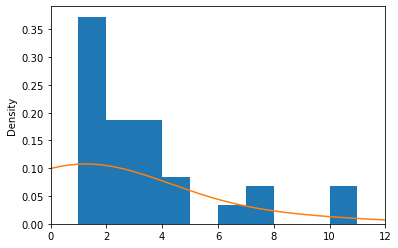

In [19]:
# Density Plot

ax = medal_count['Gold'].plot.hist(density=True, xlim=[0, 12], bins= range(1, 12))
medal_count['Gold'].plot.density(ax=ax)

## Exploring Binary and Categorical Data

In [20]:
# Mode

medal_count['Gold'].mode()

0    0
Name: Gold, dtype: int64

Text(0, 0.5, 'Number of Gold Medals')

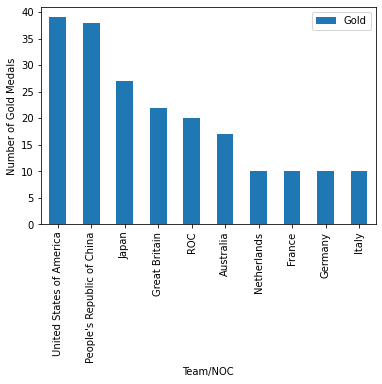

In [23]:
# Bar Chart (Plot each variable against its frequency or proportion)

ax = medal_count.iloc[:10, :].plot.bar(x= 'Team/NOC', y= 'Gold')
ax.set_ylabel('Number of Gold Medals')

([<matplotlib.patches.Wedge at 0x16ba1bbe0>,
 [Text(0.9056540287594277, 0.6243322674600584, 'United States of America'),
  Text(-0.2447730130080498, 1.0724207066739067, "People's Republic of China"),
  Text(-1.0368582567432332, 0.3673213244876799, 'Japan'),
  Text(-1.0053611027194034, -0.4463732217985588, 'Great Britain'),
  Text(-0.530227440553304, -0.9637732416311904, 'ROC'),
  Text(0.07654333332162218, -1.0973336402954277, 'Australia'),
  Text(0.5152491863253978, -0.9718633010825214, 'Netherlands'),
  Text(0.7867928028369275, -0.7687373318657108, 'France'),
  Text(0.983561130149625, -0.4925520310168184, 'Germany'),
  Text(1.0868536812649736, -0.16955552341571054, 'Italy')],
 [Text(0.4939931065960514, 0.34054487316003185, '19.2%'),
  Text(-0.13351255254984531, 0.5849567490948581, '18.7%'),
  Text(-0.5655590491326726, 0.200357086084189, '13.3%'),
  Text(-0.5483787833014927, -0.24347630279921387, '10.8%'),
  Text(-0.28921496757452936, -0.5256944954351946, '9.9%'),
  Text(0.041750909084

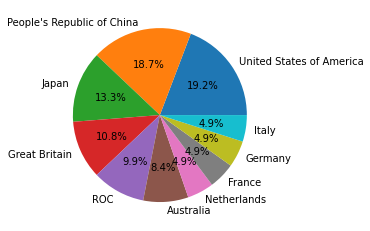

In [34]:
# Pie Chart (Plot the frequency of each category as wedges of a pie)

pie_data = medal_count.iloc[:10, :]
plt.pie(pie_data['Gold'], labels=pie_data['Team/NOC'], autopct='%.1f%%')


## Correlation

In [35]:
# Correlation (Generally use Pearson Correlaiton Coefficient which is sensitive to outliers)
# Basically measure the change in one variable will change in another variable

medal_count.corr()

,Rank,Gold,Silver,Bronze,Total,Rank by Total
Rank,1.000000,-0.655477,-0.597835,-0.637166,-0.655877,0.873539
Gold,-0.655477,1.000000,0.929046,0.862425,0.970840,-0.626012
Silver,-0.597835,0.929046,1.000000,0.862646,0.969439,-0.632831
Bronze,-0.637166,0.862425,0.862646,1.000000,0.941941,-0.745573
Total,-0.655877,0.970840,0.969439,0.941941,1.000000,-0.692450
Rank by Total,0.873539,-0.626012,-0.632831,-0.745573,-0.692450,1.000000


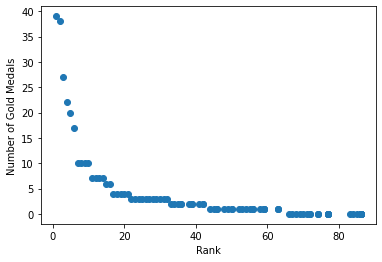

In [41]:
# Scatter Plot

plt.scatter(x= medal_count['Rank'], y= medal_count['Gold'])
plt.xlabel('Rank')
plt.ylabel('Number of Gold Medals')
plt.show()

## Exploring two or more variable

### Numeric Data vs Numeric Data

<AxesSubplot:xlabel='Gold', ylabel='Silver'>

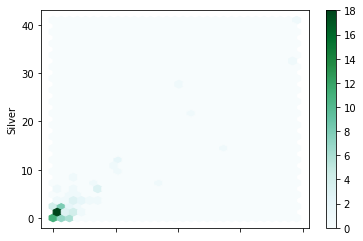

In [44]:
# Hexagonal Binning using Pandas

medal_count.plot.hexbin(x='Gold', y='Silver', gridsize=30)

/opt/anaconda3/envs/minimal_ds/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gold', ylabel='Silver'>

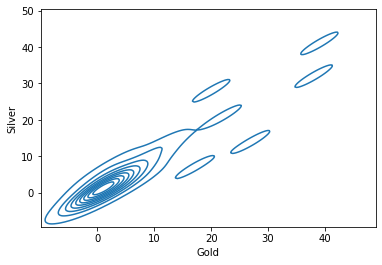

In [49]:
# Contour Plots (a layer of line that help determine where the data is the most dense)

import seaborn as sns
ax = sns.kdeplot(medal_count['Gold'], medal_count['Silver'])
ax


<AxesSubplot:>

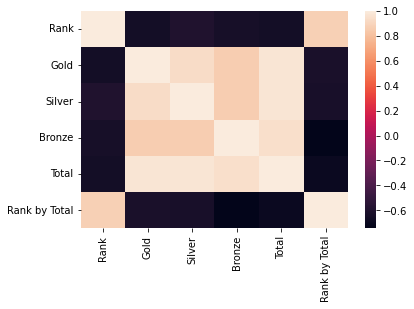

In [51]:
# Heatmap (Another way to look at data by using colors to communicate densities)

sns.heatmap(medal_count.corr())


### Categorical Data vs Categorical Data

In [63]:
# Contingency or Pivot Tables (Count the number of occurance between two variables within a dataset)

Conti_Table = medal_count[['Silver', 'Gold']].pivot_table(index='Silver', columns='Gold', aggfunc=lambda x: len(x), margins=True)
Conti_Table.fillna(0, inplace=False)



Gold,0,1,2,3,4,6,7,10,17,20,22,27,38,39,All
Silver,,,,,,,,,,,,,,,
0,11.0,7.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24
1,12.0,6.0,3.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26
2,2.0,5.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
3,2.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
4,1.0,0.0,1.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
5,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
6,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


### Categorical Data vs Numerical Data

<AxesSubplot:xlabel='Gold'>

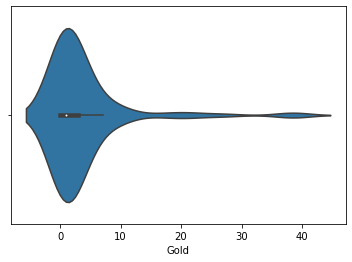

In [64]:
# Violin Plots (Variation of box plots which shows the distribution of values within the boxes)

sns.violinplot(x=medal_count['Gold'])

